In [ ]:
#######################################################################################################################
# Project: Deep Virtual Rapport Agent (data analysis)
#
#     Jan Ondras (jo951030@gmail.com)
#     Institute for Creative Technologies, University of Southern California
#     April-October 2019
#
#######################################################################################################################
# Analysis and statistics of the vra1 dataset
#######################################################################################################################

# All the data (from all listeners and speakers)

(i.e., before data consolidation)

71 files with listener nods<br />
60 files with speaker nods

In [1]:
#######################################################################################################################
# Identify all ELAN tier names and record head gesture durations
#######################################################################################################################

import glob 
import pympi
from collections import defaultdict


hgs = dict()

# Listener head gesture durations
hgs['L'] = defaultdict(list)
# Speaker head gesture durations
hgs['S'] = defaultdict(list)

# Map ELAN tier names to head gesture categories
tier_names_map = {
    'Head Nods': 'nod', 
    'Head Nod': 'nod', 
    'Head Motion': 'nod', 
    'Head motion': 'nod',
    
    'Head tilt': 'tilt', 
    'Head Tilt': 'tilt', 
    'Heat Tilt': 'tilt', 
    'Head Tilts': 'tilt'
}

s = set()
cnt_files = 0

for file_path in glob.glob('./../../datasets/vra1/*/*/*nod.eaf'):
        
    cnt_files += 1
    # Listener or speaker (string 'L' or 'S')
    LorS = file_path.split('.')[-3]
    
    eafob = pympi.Elan.Eaf(file_path)
    
    for tier_name in eafob.get_tier_names():
        hg_name = tier_names_map.get(tier_name, '')
        
        if hg_name != '':
            anns = eafob.get_annotation_data_for_tier(tier_name)

            for ann in anns:
                hgs[LorS][hg_name].append((ann[1] - ann[0])/1000)
                
            print(anns)

    s.update(eafob.get_tier_names())
    
print(f'Processed {cnt_files} files')
print(f'Tier names: {s}')

Parsing unknown version of ELAN spec... This could result in errors...
[(26680, 26920, 'Head nod'), (45180, 45400, 'Head nod'), (51560, 52170, 'Head nod'), (52780, 54180, 'Head nod'), (83050, 83360, 'Head nod'), (91900, 92860, 'Head nod'), (107670, 107780, 'Head nod'), (114490, 115530, 'Head nod'), (122640, 124030, 'Head nod')]
Parsing unknown version of ELAN spec... This could result in errors...
[(32070, 32620, '???'), (50720, 51700, ''), (58350, 59700, ''), (57060, 58350, ''), (87990, 89000, ''), (97460, 98410, ''), (119850, 120960, ''), (128010, 129460, ''), (148100, 150250, '')]
Parsing unknown version of ELAN spec... This could result in errors...
[(22860, 23440, '')]
Parsing unknown version of ELAN spec... This could result in errors...
[(17152, 17422, 'Head Nod'), (58210, 58790, 'Head motion'), (65840, 65990, 'Head nod'), (81660, 82120, 'Head Nod'), (101350, 101510, 'Head Nod')]
Parsing unknown version of ELAN spec... This could result in errors...
Parsing unknown version of EL

Mean: 1.6438061674008815	 Median: 1.29


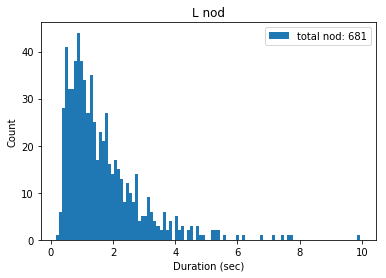

Mean: 1.431235521235521	 Median: 0.89


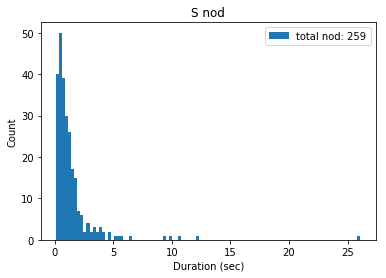

Mean: 0.9124657534246575	 Median: 0.77


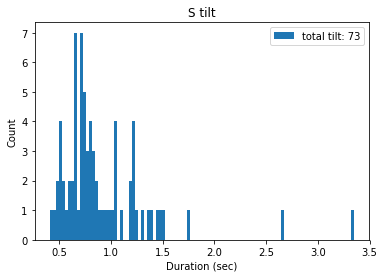

 Nods overall:
Mean: 1.585236170212766	 Median: 1.18


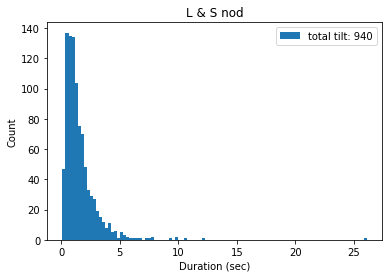

In [4]:
#######################################################################################################################
# Plot the distributions of the above-recorded head gesture durations
#
#     head gestures: nod, tilt
#     for listeners and speakers separately as well as combined 
#
#######################################################################################################################

import matplotlib.pyplot as plt
import numpy as np

bins_range = 100

for LorS in ['L', 'S']:
    for k in hgs[LorS].keys():
        print(f'Mean: {np.mean(hgs[LorS][k])}\t Median: {np.median(hgs[LorS][k])}')
        plt.figure()
        plt.title(LorS + ' ' + k)
        plt.hist(hgs[LorS][k], bins=bins_range, label=f'total {k}: {len(hgs[LorS][k])}')
        plt.xlabel('Duration (sec)')
        plt.ylabel('Count')
        plt.legend()
        plt.show()

print('===========================================================================\n Nods overall:')
all_nods = hgs['L']['nod'] + hgs['S']['nod']

print(f'Mean: {np.mean(all_nods)}\t Median: {np.median(all_nods)}')
plt.figure()
plt.title('L & S nod')
plt.hist(all_nods, bins=bins_range, label=f'total {k}: {len(all_nods)}')
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.legend()
plt.show()

In [5]:
#######################################################################################################################
# Total durations of head gestures
#######################################################################################################################

for LorS in ['L', 'S']:
    for k in hgs[LorS].keys():
        
        print(f"total duration of {LorS} {k}: {np.sum(hgs[LorS][k])} seconds")

total duration of L nod: 1119.4320000000002 seconds
total duration of S nod: 370.68999999999994 seconds
total duration of S tilt: 66.61 seconds


# After data consolidation - listener nods only

In [1]:
#######################################################################################################################
# Identify all ELAN tier names and record head gesture durations
#######################################################################################################################

import glob
import pympi
from collections import defaultdict

hgs = dict()

# Listener head gesture durations
hgs['L'] = defaultdict(list)
# Speaker head gesture durations
hgs['S'] = defaultdict(list)

# Map ELAN tier names to head gesture categories
tier_names_map = {
    'Head Nods': 'nod', 
    'Head Nod': 'nod', 
    'Head Motion': 'nod', 
    'Head motion': 'nod',
    
    'Head tilt': 'tilt', 
    'Head Tilt': 'tilt', 
    'Heat Tilt': 'tilt', 
    'Head Tilts': 'tilt'
}

s = set()
cnt_files = 0

for file_path in glob.glob('./../../datasets/vra1/listener_nod_annotations_org_filenames/*.L.nod.eaf'):
        
    cnt_files += 1
    # Listener or speaker (string 'L' or 'S')
    LorS = file_path.split('.')[-3]
    
    eafob = pympi.Elan.Eaf(file_path)
    
    for tier_name in eafob.get_tier_names():
        hg_name = tier_names_map.get(tier_name, '')
        
        if hg_name != '':
            anns = eafob.get_annotation_data_for_tier(tier_name)

            for ann in anns:
                hgs[LorS][hg_name].append((ann[1] - ann[0])/1000)
                
            print(anns)

    s.update(eafob.get_tier_names())
    
print(f'Processed {cnt_files} files')
print(f'Tier names: {s}')

Parsing unknown version of ELAN spec... This could result in errors...
[(18630, 19080, ''), (20660, 21460, ''), (22130, 24620, ''), (52870, 53500, ''), (77300, 77900, ''), (103150, 103840, ''), (168750, 169240, ''), (181570, 183490, '')]
Parsing unknown version of ELAN spec... This could result in errors...
[]
Parsing unknown version of ELAN spec... This could result in errors...
[(15480, 17130, ''), (25890, 27890, ''), (27890, 34082, ''), (40240, 41250, ''), (63908, 65868, ''), (75663, 77763, ''), (118898, 120448, ''), (138721, 141081, '')]
Parsing unknown version of ELAN spec... This could result in errors...
[(53530, 56080, ''), (86440, 90440, ''), (93570, 97400, '')]
Parsing unknown version of ELAN spec... This could result in errors...
[(9460, 11590, ''), (15680, 16200, ''), (17660, 18590, ''), (27390, 28440, ''), (30380, 32000, ''), (39100, 40340, ''), (42770, 43650, ''), (53490, 54380, ''), (56900, 57830, ''), (71910, 72680, ''), (79450, 80560, ''), (89790, 91670, ''), (100260, 

Mean: 1.7617878103837472 	 Std: 1.262863556088348 	 Median: 1.41
Min: 0.29	 Max: 9.95


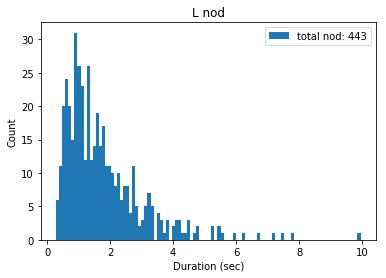

In [3]:
#######################################################################################################################
# Plot the distributions of the above-recorded head gesture durations
#
#     listener nods only
#
#######################################################################################################################

import matplotlib.pyplot as plt
import numpy as np

bins_range = 100

for LorS in ['L', 'S']:
    for k in hgs[LorS].keys():
        print(f'Mean: {np.mean(hgs[LorS][k])} \t Std: {np.std(hgs[LorS][k])} \t Median: {np.median(hgs[LorS][k])}')
        print(f'Min: {np.min(hgs[LorS][k])}\t Max: {np.max(hgs[LorS][k])}')
        # Save all durations for overall stats
        np.savez(f'./gesture_durations/{k}_vra1', durations=hgs[LorS][k])
        
        plt.figure()
        plt.title(LorS + ' ' + k)
        plt.hist(hgs[LorS][k], bins=bins_range, label=f'total {k}: {len(hgs[LorS][k])}')
        plt.xlabel('Duration (sec)')
        plt.ylabel('Count')
        plt.legend()
        plt.show()


In [4]:
#######################################################################################################################
# Total duration of listener nods
#######################################################################################################################

for LorS in ['L', 'S']:
    for k in hgs[LorS].keys():
        
        print(f"total duration of {LorS} {k}: {np.sum(hgs[LorS][k])} seconds")

total duration of L nod: 780.472 seconds


## Number of frames where face failed to be detected by OpenFace

In [1]:
#######################################################################################################################
# For each video, count the number of frames where face failed to be detected by OpenFace
#######################################################################################################################

###########################################################
import numpy as np
random_seed = 37
np.random.seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
###########################################################

import os
import glob
import pandas as pd
import time

n_folds = 45
dataset_split_filename = f'/home/ICT2000/jondras/datasets/vra1/subject_independent/dataset_split_{n_folds}fold.npz'
input_features_dir = '/home/ICT2000/jondras/datasets/vra1/listener_features'

sids = []
failed_frames_cnt = []
total_frames_cnt = []

# Iterate over subjects as given by the split into 45 folds
for k in range(n_folds):
    feature_filename = np.load(dataset_split_filename)[f'{k}_test'][0]
    sid = feature_filename.split('/')[-1].split('.')[0][3:]
    print(f'Processing SESID / Subject ID {sid}')
    sids.append(sid)
    df = pd.read_csv(f'{input_features_dir}/SES{sid}.csv')
    failed_frames_cnt.append(len(df[df[' success'] == 0]))
    total_frames_cnt.append(len(df)) 
    
failed_frames_cnt = np.array(failed_frames_cnt)
total_frames_cnt = np.array(total_frames_cnt)

Processing SESID / Subject ID 144
Processing SESID / Subject ID 148
Processing SESID / Subject ID 101
Processing SESID / Subject ID 161
Processing SESID / Subject ID 142
Processing SESID / Subject ID 39
Processing SESID / Subject ID 98
Processing SESID / Subject ID 109
Processing SESID / Subject ID 95
Processing SESID / Subject ID 102
Processing SESID / Subject ID 112
Processing SESID / Subject ID 110
Processing SESID / Subject ID 114
Processing SESID / Subject ID 9
Processing SESID / Subject ID 60
Processing SESID / Subject ID 138
Processing SESID / Subject ID 53
Processing SESID / Subject ID 83
Processing SESID / Subject ID 104
Processing SESID / Subject ID 38
Processing SESID / Subject ID 141
Processing SESID / Subject ID 159
Processing SESID / Subject ID 154
Processing SESID / Subject ID 153
Processing SESID / Subject ID 163
Processing SESID / Subject ID 149
Processing SESID / Subject ID 160
Processing SESID / Subject ID 164
Processing SESID / Subject ID 146
Processing SESID / Subj

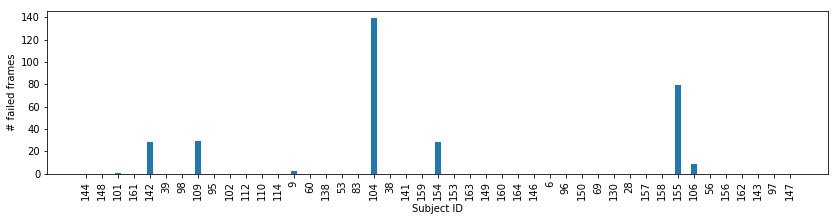

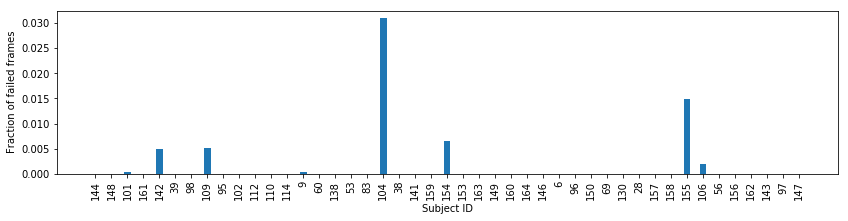

[  0   0   1   0  28   0   0  29   0   0   0   0   0   2   0   0   0   0
 139   0   0   0  28   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  79   9   0   0   0   0   0   0]
[3278 2471 4089 4412 5630 5939 2110 5626 5296 6352 3983 3545 2164 5186
 3085 4433 3953 7661 4487 4047 6632 4334 4301 2087 3041 3185 2420 2546
 3716 7365 2475 4049 4514 4115 5446 3086 4385 5336 4838 4213 3686 5345
 3740 3245 5534]
[0.         0.         0.00024456 0.         0.00497336 0.
 0.         0.00515464 0.         0.         0.         0.
 0.         0.00038565 0.         0.         0.         0.
 0.03097838 0.         0.         0.         0.00651011 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0148051  0.00186027 0.         0.         0.
 0.         0.         0.        ]


In [3]:
#######################################################################################################################
# Plot the counts of frames where face failed to be detected by OpenFace
#######################################################################################################################

from matplotlib import pyplot as plt

# Plot absolute counts
plt.figure(figsize=[14,3])
x_axis = np.arange(len(failed_frames_cnt))
w = 0.4
plt.bar(x_axis, failed_frames_cnt, align='center', width=w)
plt.xticks(x_axis, sids, rotation=90)
plt.xlabel('Subject ID')
plt.ylabel('# failed frames')

plt.show()
            
# Plot relative counts
relative_frame_cnt = failed_frames_cnt / total_frames_cnt
plt.figure(figsize=[14,3])
x_axis = np.arange(len(relative_frame_cnt))
w = 0.4
plt.bar(x_axis, relative_frame_cnt, align='center', width=w) 
plt.xticks(x_axis, sids, rotation=90)
plt.xlabel('Subject ID')
plt.ylabel('Fraction of failed frames')
plt.show()

print(failed_frames_cnt)
print(total_frames_cnt)
print(relative_frame_cnt)

In [15]:
#######################################################################################################################
# For the subject (sid=104) with most failed frames, check the values of features from the frames where face failed to 
# be detected by OpenFace.
# => looks ok
#######################################################################################################################

sid = 104

# input_features_dir = '/home/ICT2000/jondras/datasets/vra1/listener_features'
input_features_dir = '/home/ICT2000/jondras/datasets/vra1/listener_annotated_features_perframe/'

features_to_see = np.array([
    ' pose_Rx', ' pose_Ry', ' pose_Rz',
    'diff_ pose_Rx', 'diff_ pose_Ry', 'diff_ pose_Rz'
])

df = pd.read_csv(f'{input_features_dir}/SES{sid}.csv')
print(df[df[' success'] == 0][features_to_see])


       pose_Rx   pose_Ry   pose_Rz  diff_ pose_Rx  diff_ pose_Ry  \
1        0.143    -0.242    -0.009         -0.042          0.011   
13       0.131    -0.220    -0.046          0.003          0.002   
14       0.111    -0.221    -0.040         -0.020         -0.001   
15       0.093    -0.223    -0.040         -0.018         -0.002   
16       0.101    -0.225    -0.032          0.008         -0.002   
17       0.110    -0.234    -0.047          0.009         -0.009   
18       0.123    -0.219    -0.044          0.013          0.015   
19       0.123    -0.225    -0.037          0.000         -0.006   
20       0.135    -0.233    -0.029          0.012         -0.008   
21       0.145    -0.236    -0.021          0.010         -0.003   
22       0.138    -0.242    -0.020         -0.007         -0.006   
23       0.137    -0.243    -0.017         -0.001         -0.001   
24       0.141    -0.250    -0.006          0.004         -0.007   
25       0.149    -0.252    -0.007          0.00

## Nod statistics per subject (cleaned data)

In [28]:
###########################################################
import numpy as np
random_seed = 37
np.random.seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
###########################################################

import os
import glob
import pandas as pd
import time
from matplotlib import pyplot as plt

n_folds = 45
dataset_split_filename = f'/home/ICT2000/jondras/datasets/vra1/subject_independent/dataset_split_{n_folds}fold.npz'
sids = [np.load(dataset_split_filename)[f'{k}_test'][0].split('/')[-1].split('.')[0][3:] for k in range(n_folds)]

nods_offsets_filename = f'/home/ICT2000/jondras/datasets/vra1/offsetListenerNods.txt'
nods_offsets = np.loadtxt(nods_offsets_filename)

input_features_dir = '/home/ICT2000/jondras/datasets/vra1/listener_annotated_features_perframe'

nod_cnts = []
nod_lens_means = []
nod_lens_stds = []
nod_lens_all = []
x_data_nod_lens_all = []
nod_frame_cnts = []
notnod_frame_cnts = []

# Iterate over subjects as given by the split into 45 folds
for j, sid in enumerate(sids):
    print(f'Processing SESID / Subject ID {sid}')
    
    # Ignore the beginning of the recording prior to the beep
    offset = nods_offsets[int(sid) - 1]
    df = pd.read_csv(f'{input_features_dir}/SES{sid}.csv')
    df = df[df[' timestamp'] >= offset]
    ann = list(df['nod'])
       
    # Count nods (i.e., transitions from label 0 to 1) and their lengths
    nod_lens = []
    ann0 = [0] + ann + [0]
    for i in range(len(ann) + 1):
        # Nod start
        if (ann0[i] == 0) and (ann0[i + 1] == 1):
            nod_len = 0         
        # Within nod
        if ann0[i] == 1:
            nod_len += 1          
            # Nod end
            if ann0[i + 1] == 0:            
                nod_lens.append( nod_len )   
    nod_cnts.append( len(nod_lens) )
    nod_lens_means.append( np.mean(nod_lens) )
    nod_lens_stds.append( np.std(nod_lens) )
    nod_lens_all.extend( nod_lens )
    x_data_nod_lens_all.extend( [j for _ in range(len(nod_lens))] )
    
    # Count nod and notnod frames
    notnod_frame_cnts.append( ann.count(0) )
    nod_frame_cnts.append( ann.count(1) )
    
    print(nod_lens)
    
#     break
    

Processing SESID / Subject ID 144
[16, 9]
Processing SESID / Subject ID 148
[43, 49, 57, 47, 36, 36, 53, 39, 26, 133, 20, 68, 31, 61]
Processing SESID / Subject ID 101
[76, 120, 115]
Processing SESID / Subject ID 161
[100]
Processing SESID / Subject ID 142
[38, 38, 127, 14, 12, 11, 15, 75, 24, 72, 18, 38, 34, 54, 25, 14, 46, 25, 99, 36, 53, 19, 30, 56, 119, 40, 50, 142, 52, 112, 52, 223]
Processing SESID / Subject ID 39
[64, 16, 28, 32, 49, 38, 27, 26, 28, 23, 33, 57, 20, 19, 16, 43, 47, 32, 92, 29, 65, 25, 34, 46]
Processing SESID / Subject ID 98


/home/ICT2000/jondras/anaconda3/envs/dvra/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ICT2000/jondras/anaconda3/envs/dvra/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ICT2000/jondras/anaconda3/envs/dvra/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ICT2000/jondras/anaconda3/envs/dvra/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ICT2000/jondras/anaconda3/envs/dvra/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[]
Processing SESID / Subject ID 109
[]
Processing SESID / Subject ID 95
[]
Processing SESID / Subject ID 102
[46, 16, 43, 65, 30, 18, 20, 27, 28, 26, 63, 33, 68, 65, 41, 45, 46, 49, 26, 71, 26, 48, 42]
Processing SESID / Subject ID 112
[21, 49, 171, 17, 50, 83, 19, 35, 97, 14, 42, 141, 277, 52, 84, 84]
Processing SESID / Subject ID 110
[40, 33, 63, 28, 24, 24, 30, 45, 49, 63, 44, 45, 33, 32, 29, 30, 20, 87, 46, 42]
Processing SESID / Subject ID 114
[13, 12]
Processing SESID / Subject ID 9
[]
Processing SESID / Subject ID 60
[24]
Processing SESID / Subject ID 138
[43, 19, 67, 15, 60, 47, 106, 89]
Processing SESID / Subject ID 53
[23, 38, 69, 18, 55, 27, 29, 27, 24, 15, 94, 31]
Processing SESID / Subject ID 83
[299]
Processing SESID / Subject ID 104
[]
Processing SESID / Subject ID 38
[32, 38, 31, 66, 60, 72, 27, 24, 25, 32]
Processing SESID / Subject ID 141
[26, 61, 23, 19, 47, 98, 17, 31, 30, 14, 16, 20, 32, 39, 19, 32]
Processing SESID / Subject ID 159
[50, 246, 31, 59, 63, 46, 71]
P

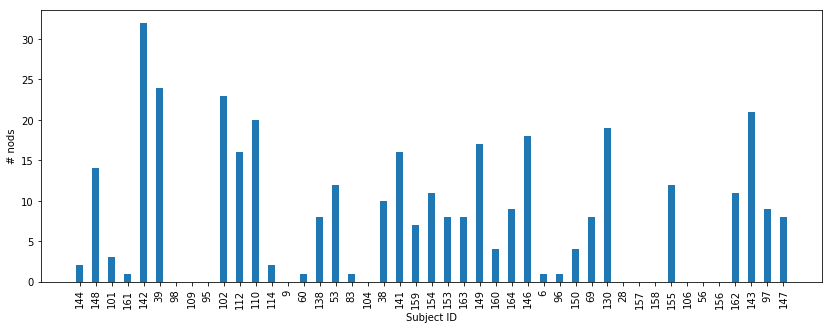

In [29]:
#######################################################################################################################
# Plot nod counts
#######################################################################################################################
plt.figure(figsize=[14,5])
x_axis = np.arange(len(sids))
w = 0.4
plt.bar(x_axis, nod_cnts, align='center', width=w)
plt.xticks(x_axis, sids, rotation=90)
plt.xlabel('Subject ID')
plt.ylabel('# nods')
plt.show()

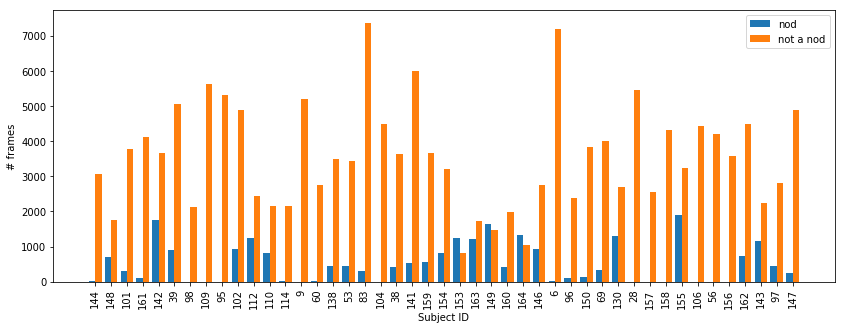

In [30]:
#######################################################################################################################
# Plot nod and notnod frame counts
#######################################################################################################################
plt.figure(figsize=[14,5])
x_axis = np.arange(len(sids))
w = 0.4
plt.bar(x_axis - w/2, nod_frame_cnts, align='center', width=w, label=f"nod")
plt.bar(x_axis + w/2, notnod_frame_cnts, align='center', width=w, label=f"not a nod")
plt.xticks(x_axis, sids, rotation=90)
plt.xlabel('Subject ID')
plt.ylabel('# frames')
plt.legend()
plt.show()

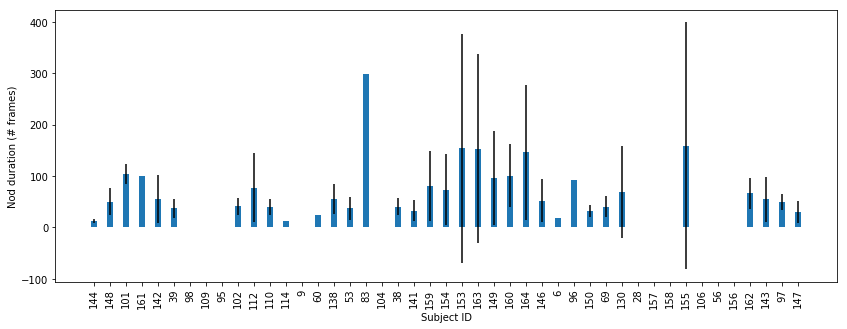

In [33]:
#######################################################################################################################
# Plot nod durations
#######################################################################################################################
plt.figure(figsize=[14,5])
x_axis = np.arange(len(sids))
w = 0.4
plt.bar(x_axis, nod_lens_means, yerr=nod_lens_stds, align='center', width=w)
plt.xticks(x_axis, sids, rotation=90)
plt.xlabel('Subject ID')
plt.ylabel('Nod duration (# frames)')
plt.show()

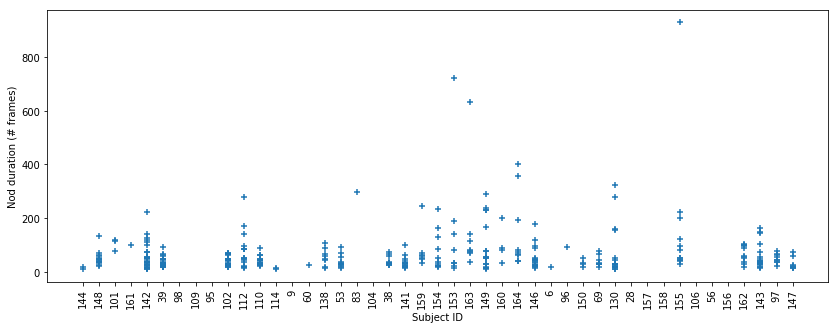

In [35]:
#######################################################################################################################
# Plot all nod durations
#######################################################################################################################
plt.figure(figsize=[14,5])
x_axis = np.arange(len(sids))
plt.scatter(x_data_nod_lens_all, nod_lens_all, marker='+')
plt.xticks(x_axis, sids, rotation=90)
plt.xlabel('Subject ID')
plt.ylabel('Nod duration (# frames)')
plt.show()

## 3D nod clusters per subject (cleaned data)

Each 3D datapoint represents one nod

Processing SESID / Subject ID 144


<IPython.core.display.Javascript object>


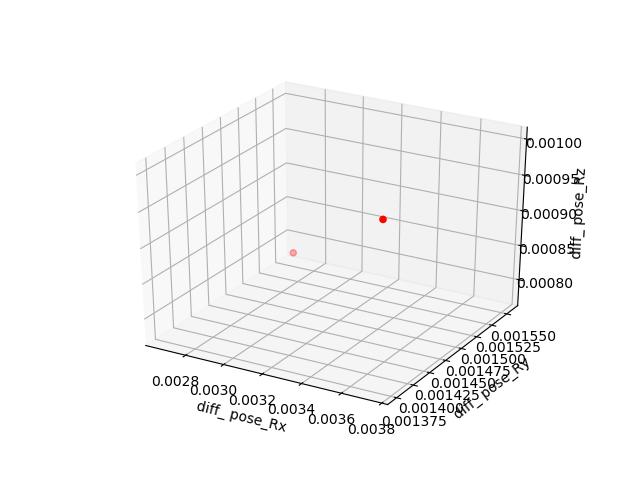

Processing SESID / Subject ID 148


<IPython.core.display.Javascript object>


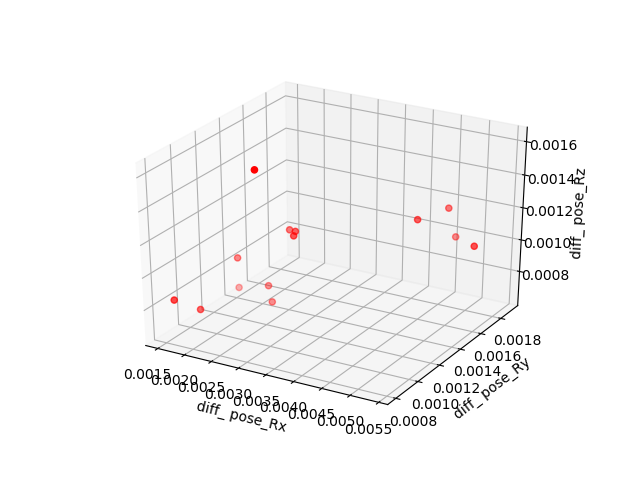

Processing SESID / Subject ID 101


<IPython.core.display.Javascript object>


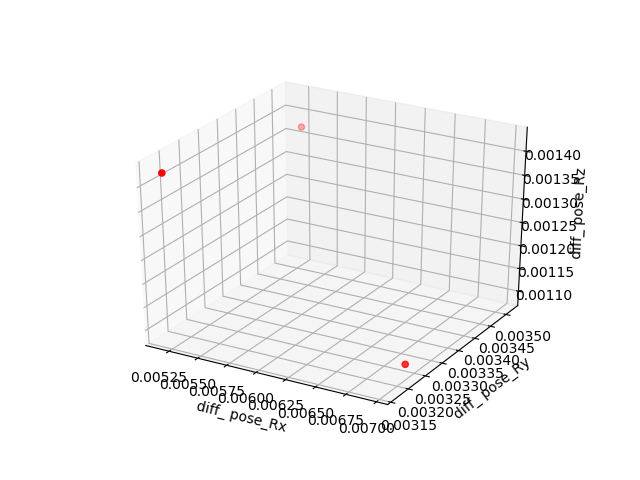

Processing SESID / Subject ID 161


<IPython.core.display.Javascript object>


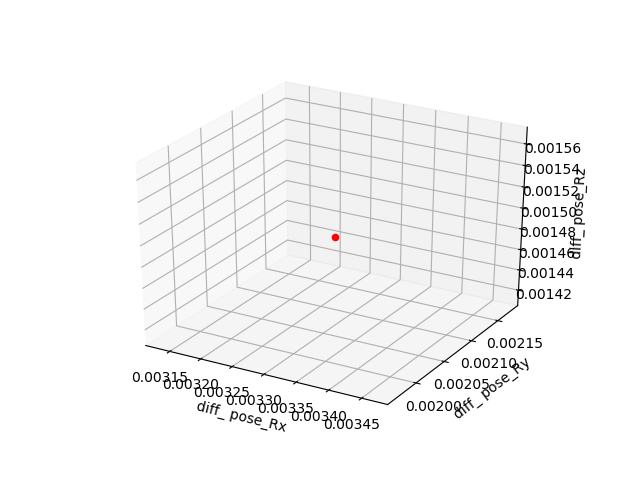

Processing SESID / Subject ID 142


<IPython.core.display.Javascript object>


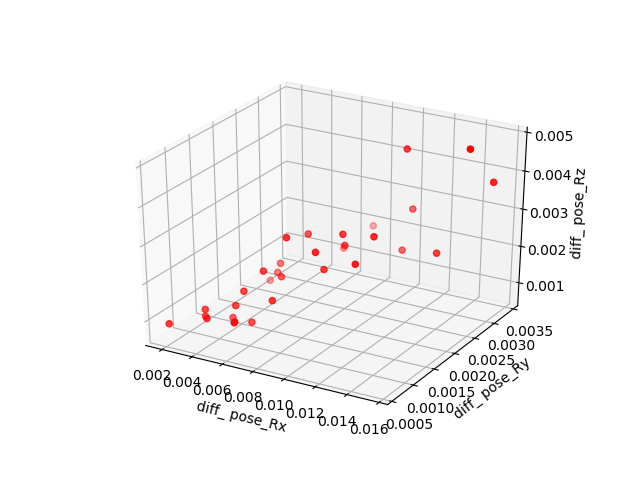

Processing SESID / Subject ID 39


<IPython.core.display.Javascript object>


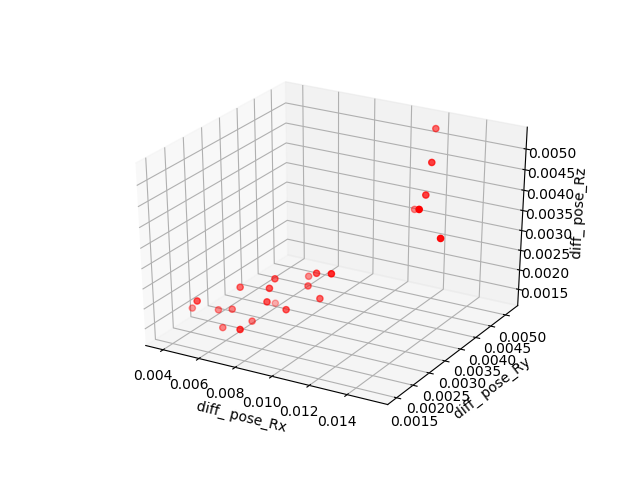

Processing SESID / Subject ID 98


<IPython.core.display.Javascript object>


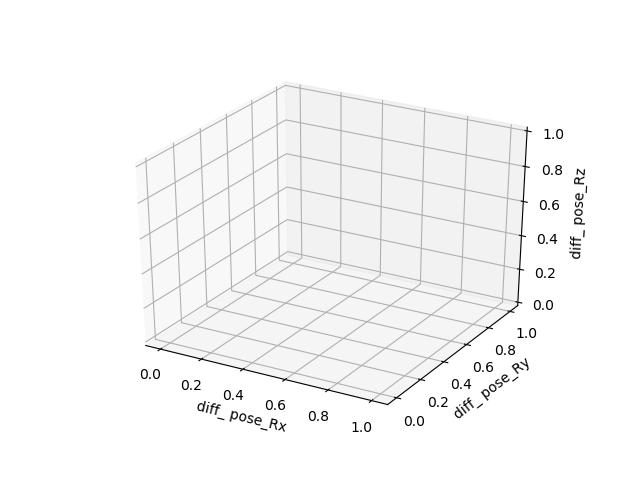

Processing SESID / Subject ID 109


<IPython.core.display.Javascript object>


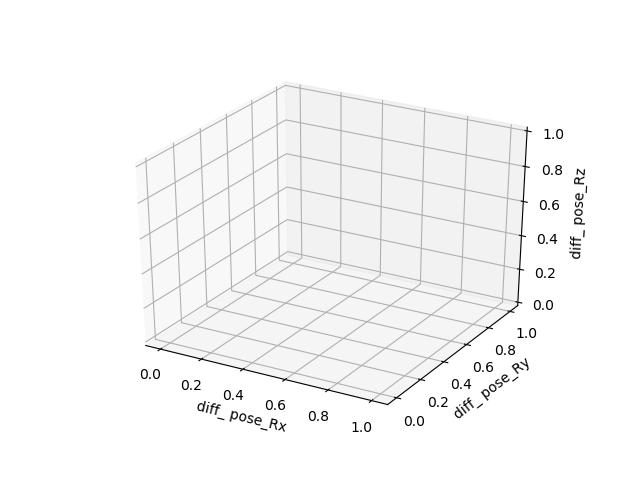

Processing SESID / Subject ID 95


<IPython.core.display.Javascript object>


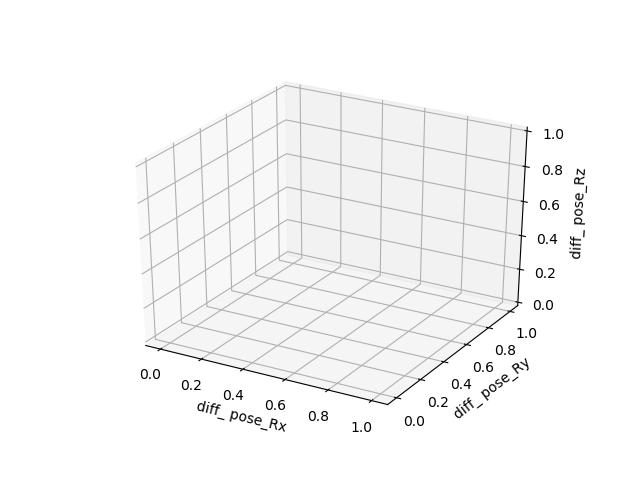

Processing SESID / Subject ID 102


<IPython.core.display.Javascript object>


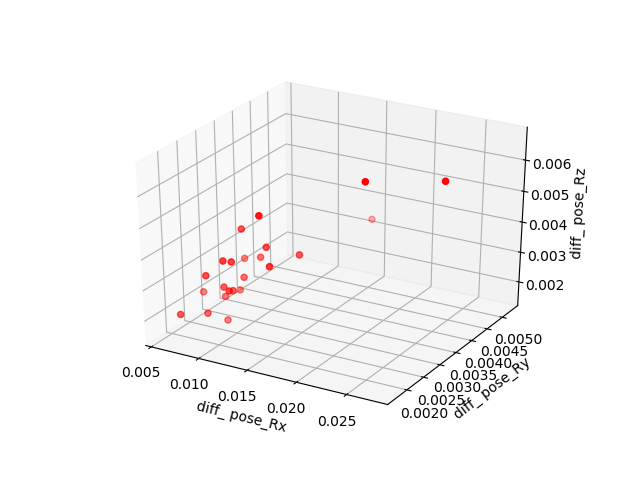

Processing SESID / Subject ID 112


<IPython.core.display.Javascript object>


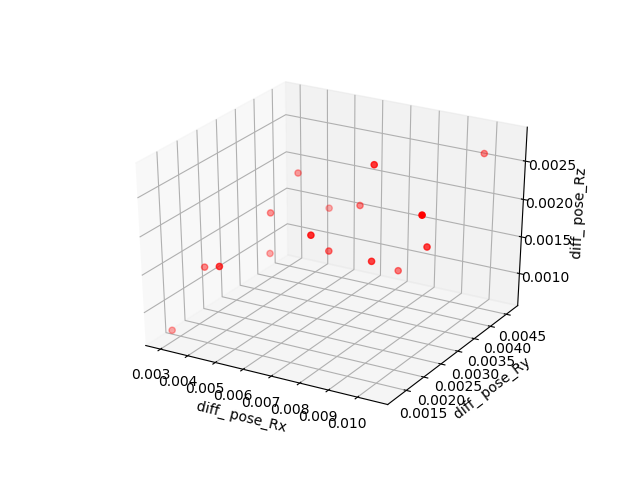

Processing SESID / Subject ID 110


<IPython.core.display.Javascript object>


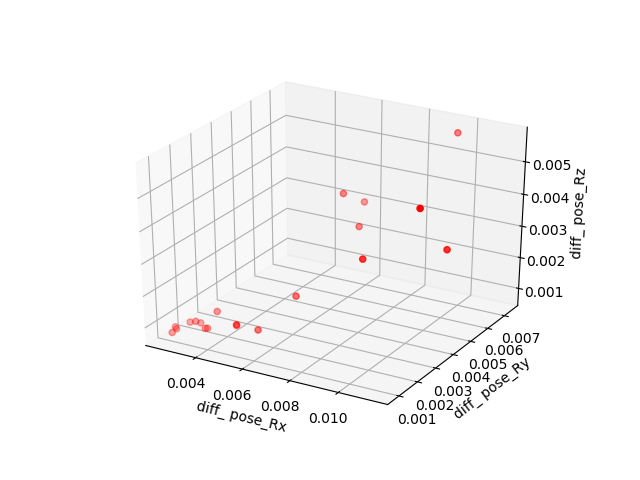

Processing SESID / Subject ID 114


<IPython.core.display.Javascript object>


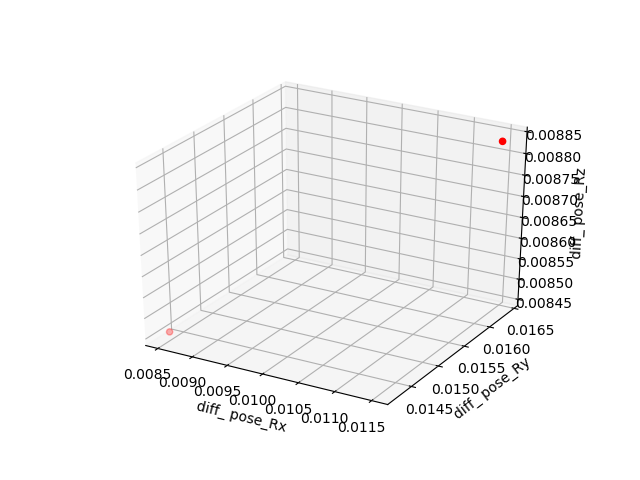

Processing SESID / Subject ID 9


<IPython.core.display.Javascript object>


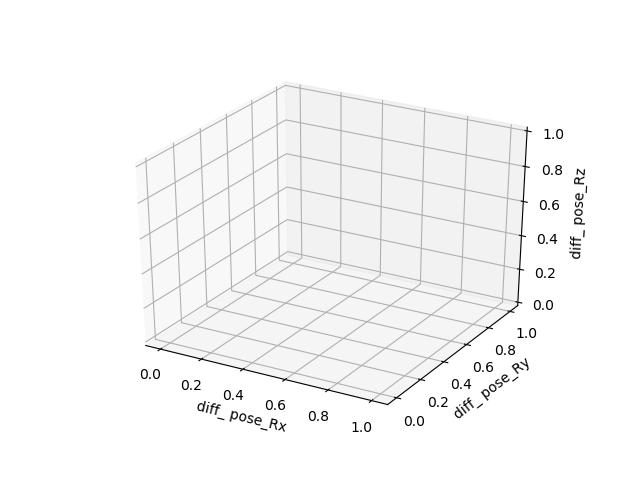

Processing SESID / Subject ID 60


<IPython.core.display.Javascript object>


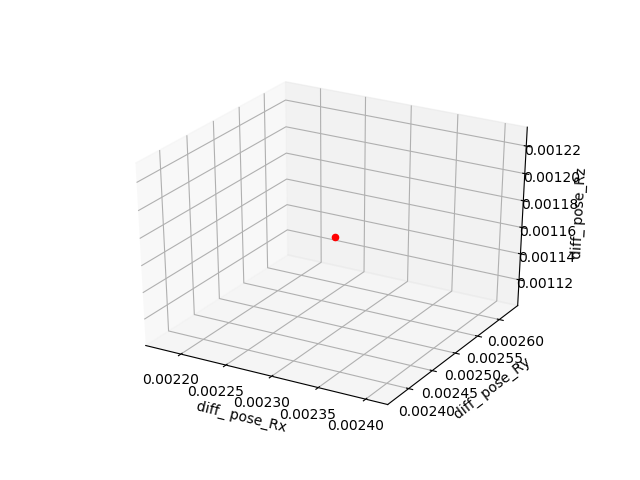

Processing SESID / Subject ID 138


<IPython.core.display.Javascript object>


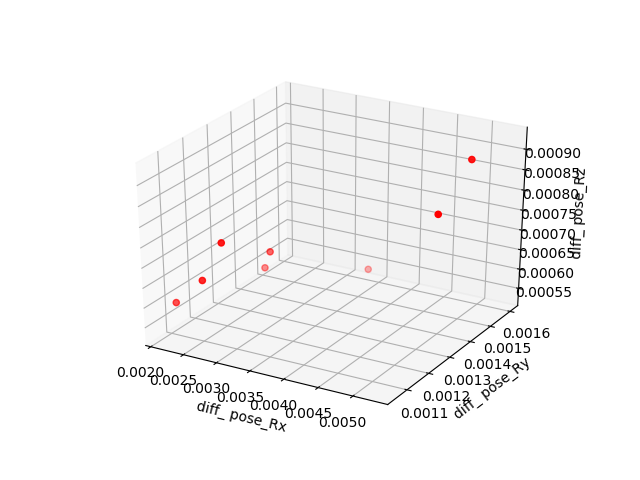

Processing SESID / Subject ID 53


<IPython.core.display.Javascript object>


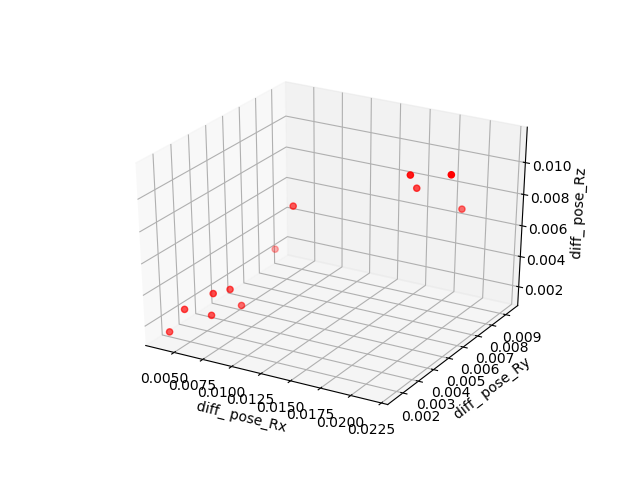

Processing SESID / Subject ID 83


<IPython.core.display.Javascript object>


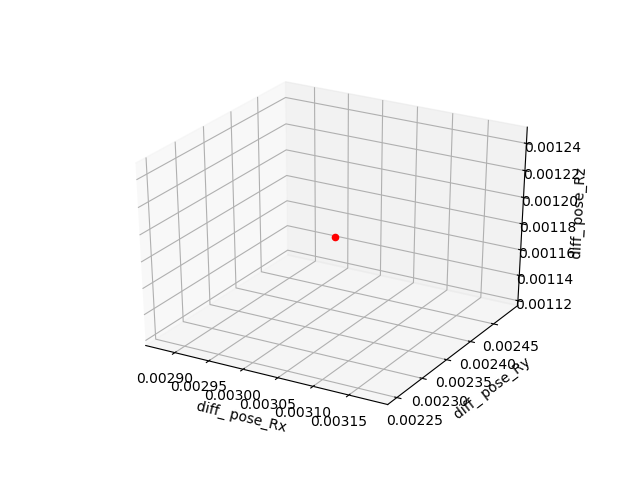

Processing SESID / Subject ID 104


<IPython.core.display.Javascript object>


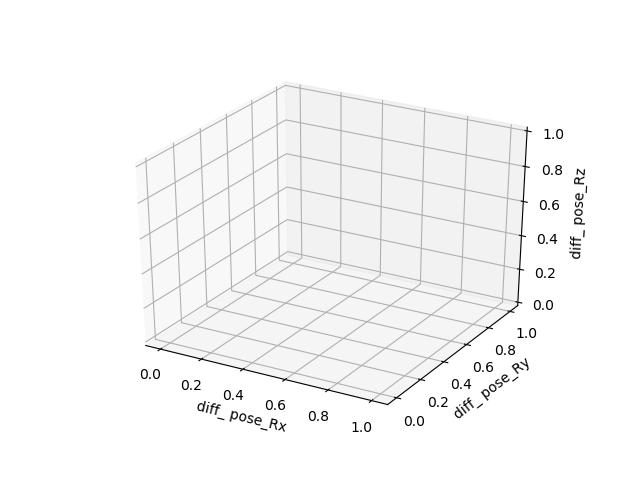

Processing SESID / Subject ID 38


<IPython.core.display.Javascript object>


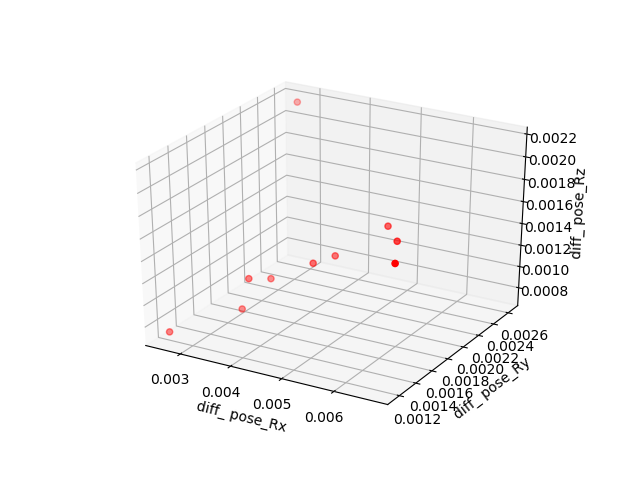

Processing SESID / Subject ID 141


<IPython.core.display.Javascript object>


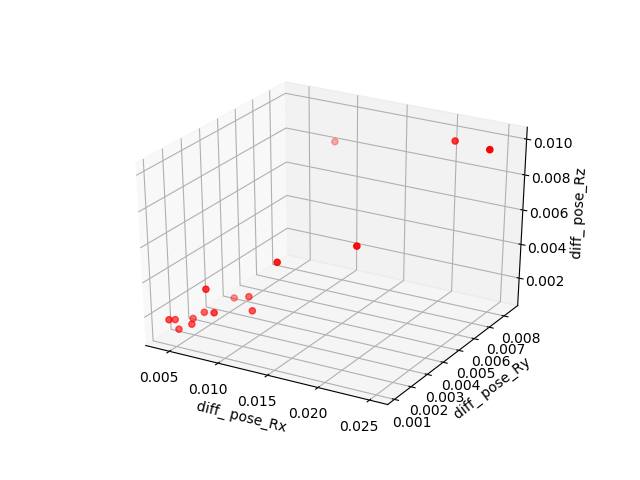

Processing SESID / Subject ID 159


<IPython.core.display.Javascript object>


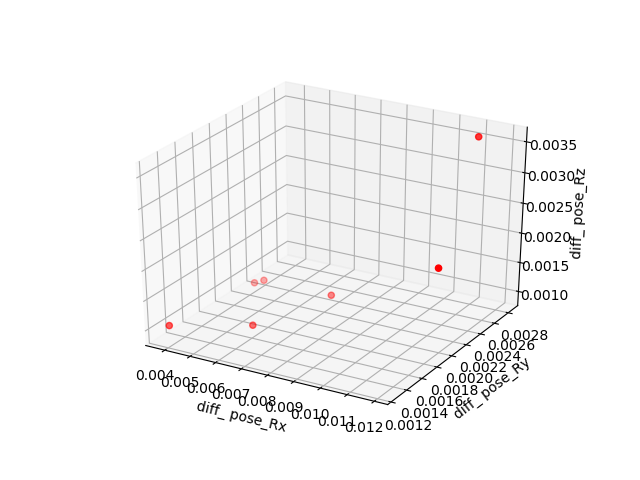

Processing SESID / Subject ID 154


<IPython.core.display.Javascript object>


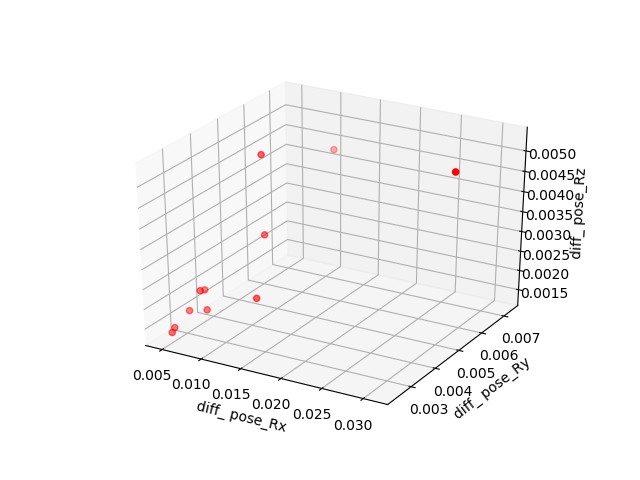

Processing SESID / Subject ID 153


<IPython.core.display.Javascript object>


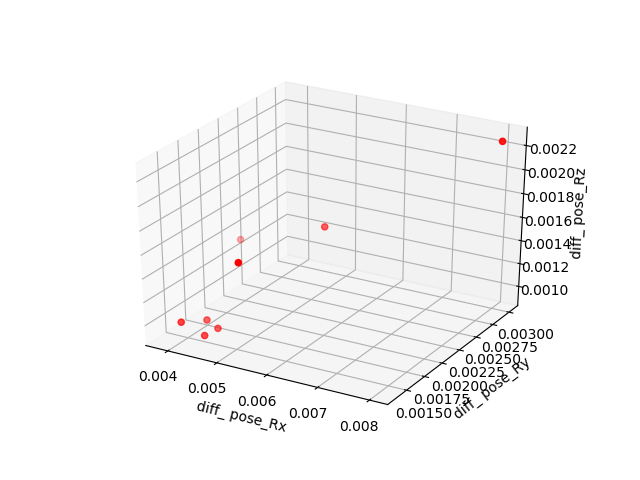

Processing SESID / Subject ID 163


<IPython.core.display.Javascript object>


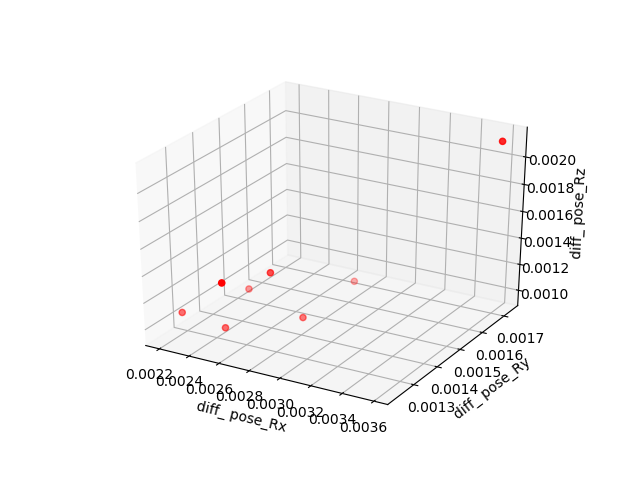

Processing SESID / Subject ID 149


<IPython.core.display.Javascript object>


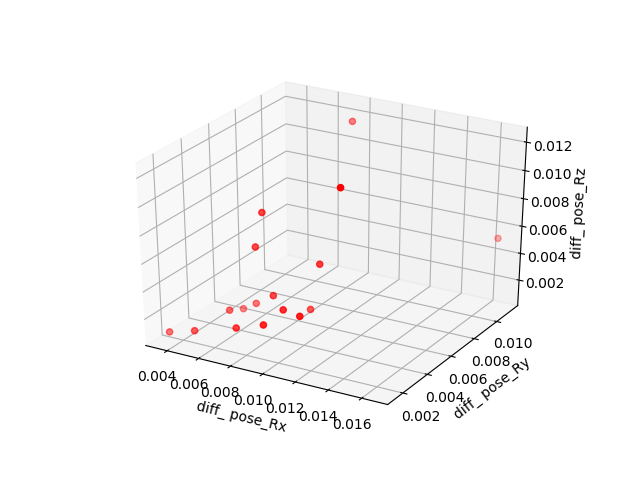

Processing SESID / Subject ID 160


<IPython.core.display.Javascript object>


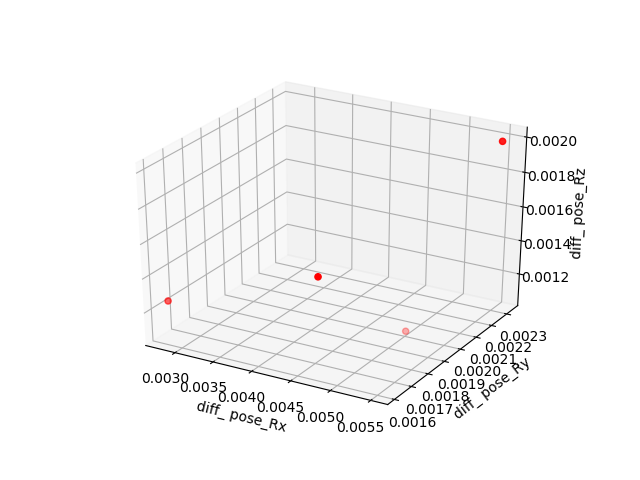

Processing SESID / Subject ID 164


<IPython.core.display.Javascript object>


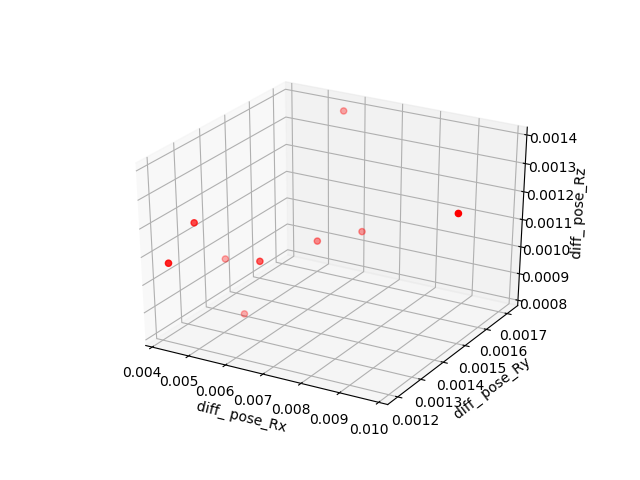

Processing SESID / Subject ID 146


<IPython.core.display.Javascript object>


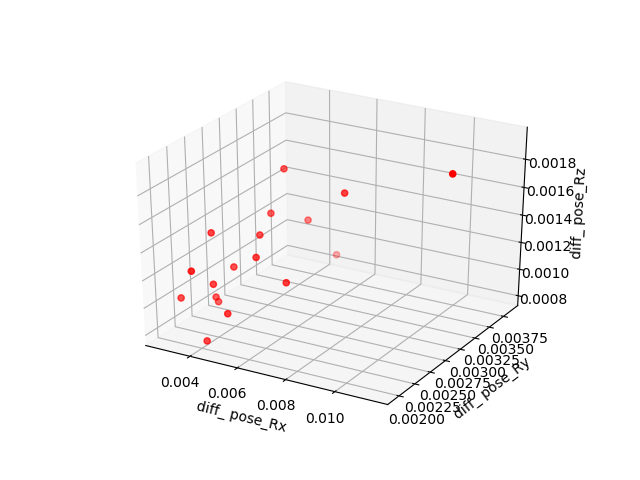

Processing SESID / Subject ID 6


<IPython.core.display.Javascript object>


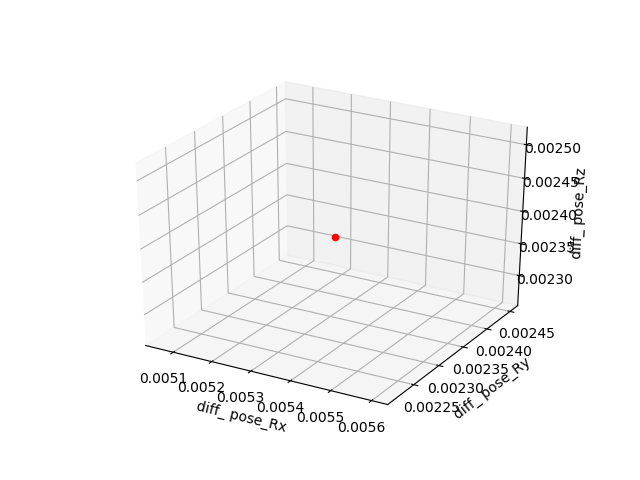

Processing SESID / Subject ID 96


<IPython.core.display.Javascript object>


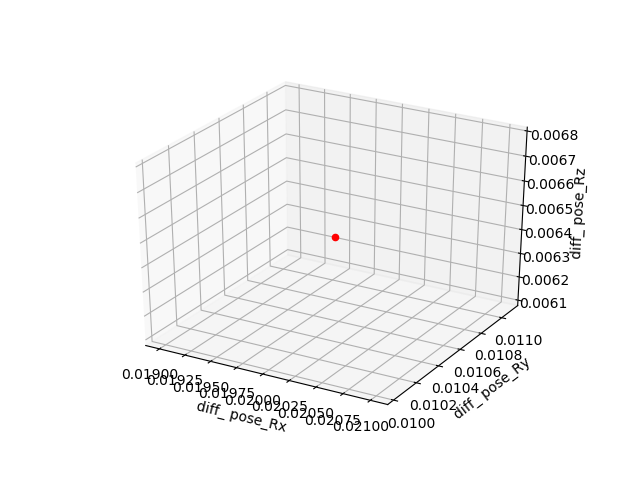

Processing SESID / Subject ID 150


<IPython.core.display.Javascript object>


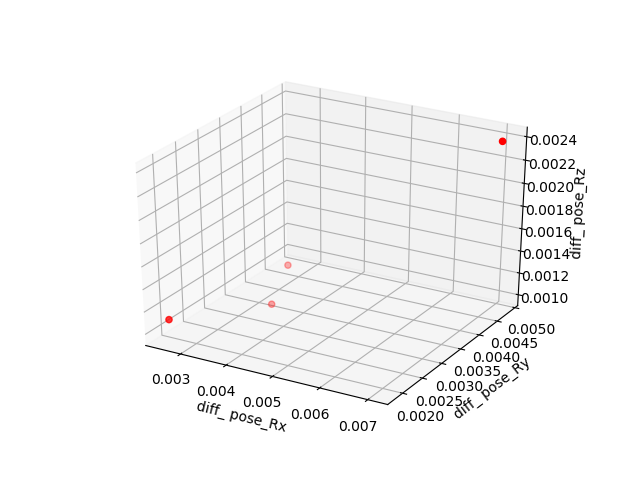

Processing SESID / Subject ID 69


<IPython.core.display.Javascript object>


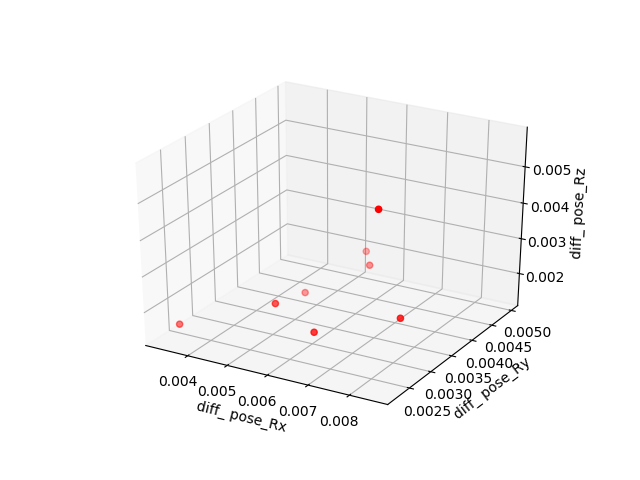

Processing SESID / Subject ID 130


<IPython.core.display.Javascript object>


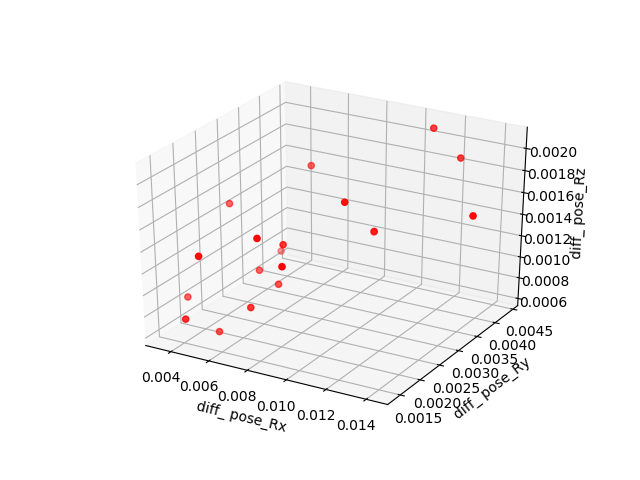

Processing SESID / Subject ID 28


<IPython.core.display.Javascript object>


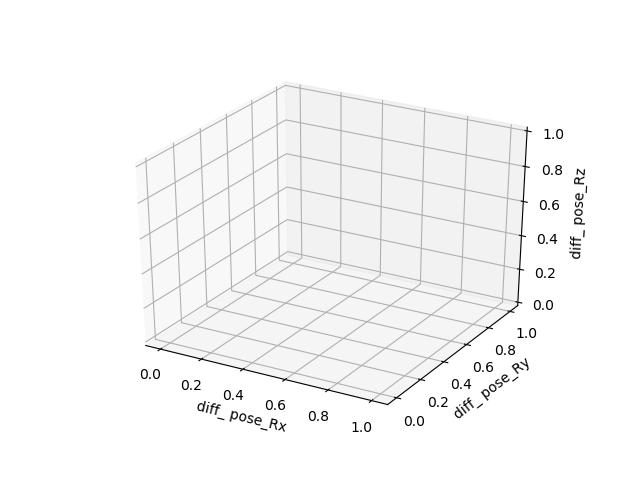

Processing SESID / Subject ID 157


<IPython.core.display.Javascript object>


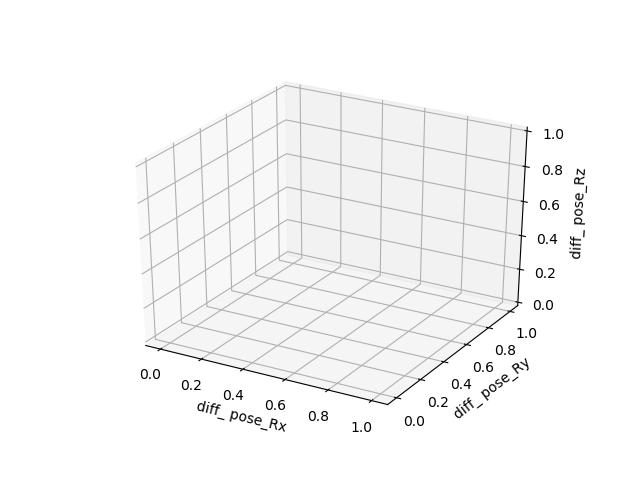

Processing SESID / Subject ID 158


<IPython.core.display.Javascript object>


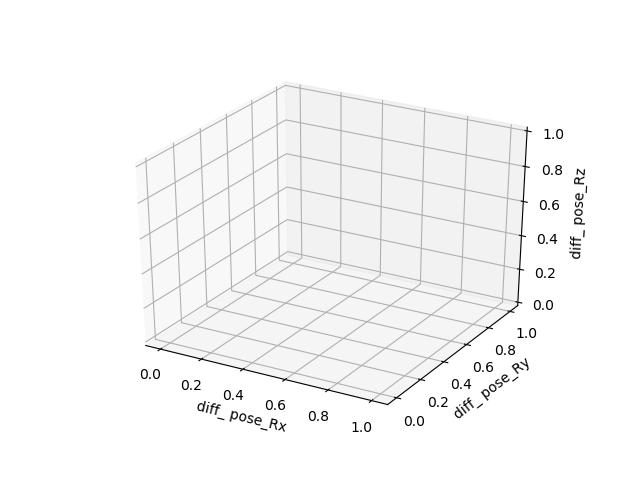

Processing SESID / Subject ID 155


<IPython.core.display.Javascript object>


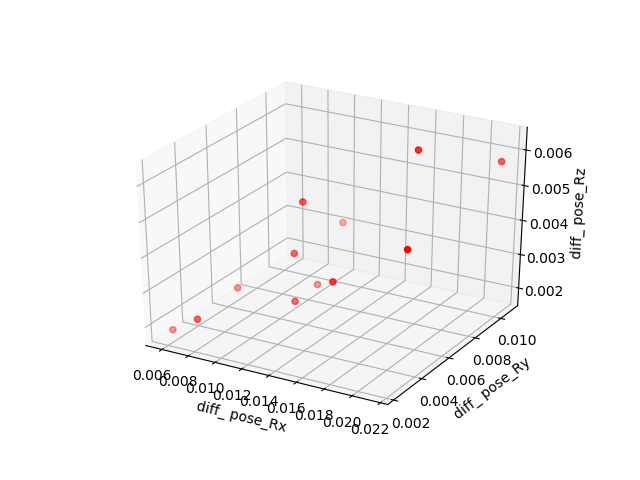

Processing SESID / Subject ID 106


<IPython.core.display.Javascript object>


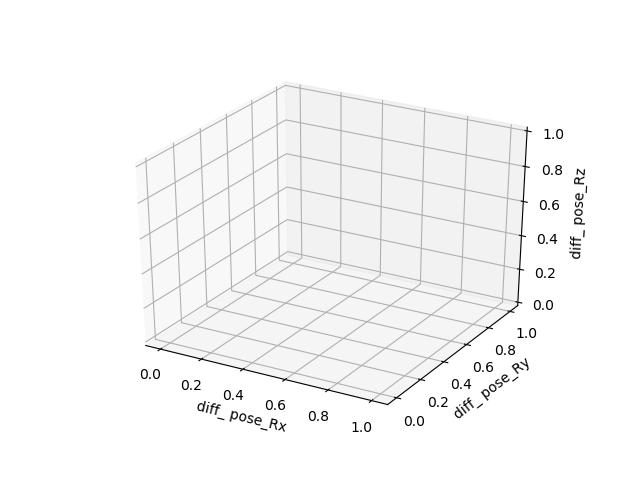

Processing SESID / Subject ID 56


<IPython.core.display.Javascript object>


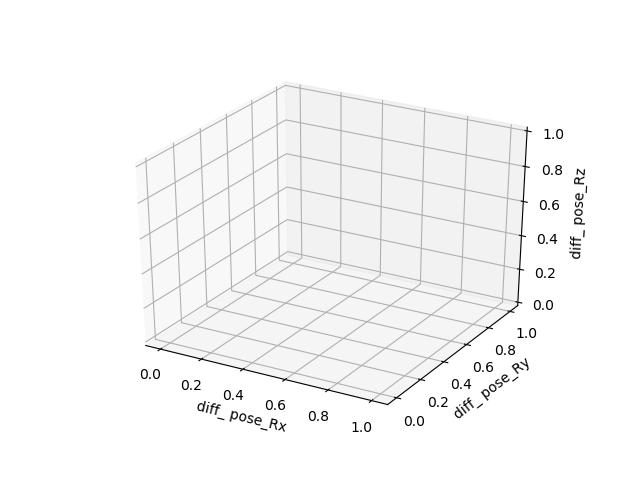

Processing SESID / Subject ID 156


<IPython.core.display.Javascript object>


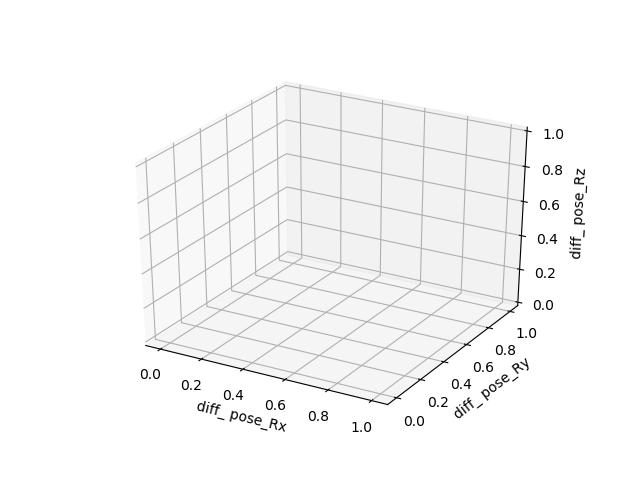

Processing SESID / Subject ID 162


<IPython.core.display.Javascript object>


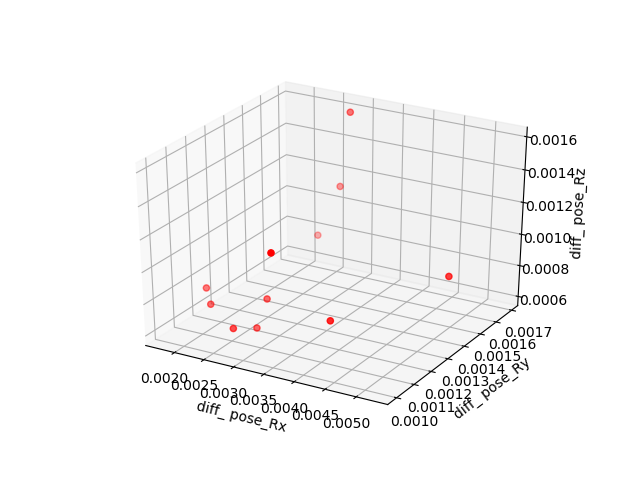

Processing SESID / Subject ID 143


<IPython.core.display.Javascript object>


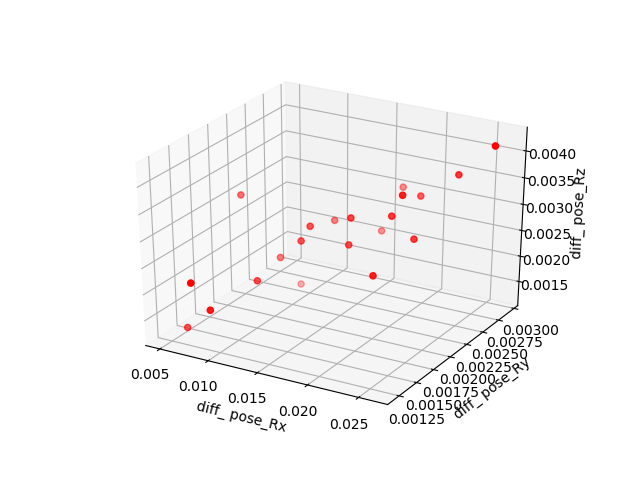

Processing SESID / Subject ID 97


<IPython.core.display.Javascript object>


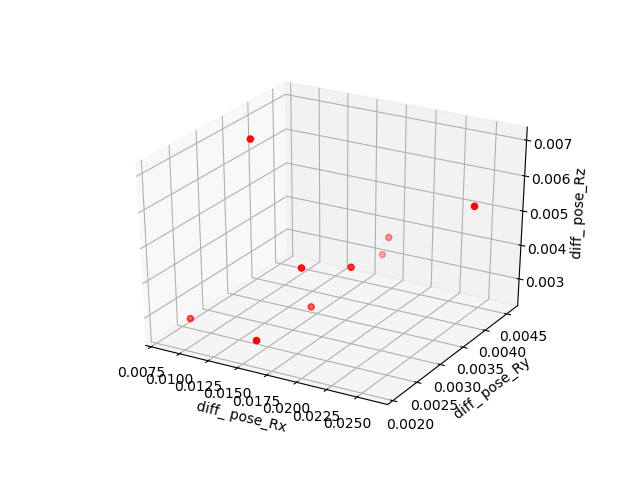

Processing SESID / Subject ID 147


<IPython.core.display.Javascript object>


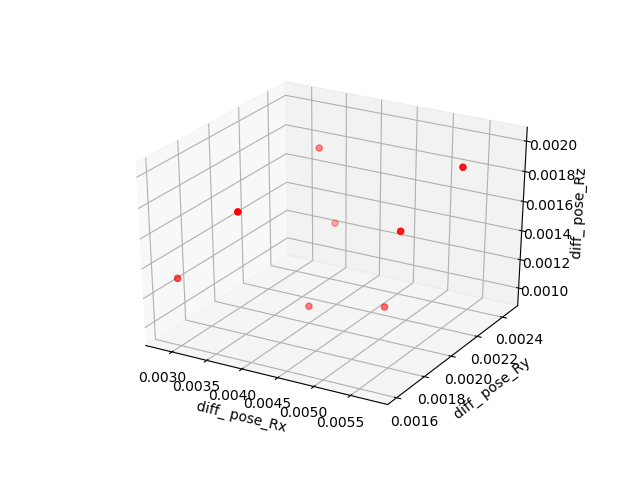

In [6]:
###########################################################
import numpy as np
random_seed = 37
np.random.seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
###########################################################

%matplotlib notebook

import os
import glob
import pandas as pd
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

n_folds = 45
dataset_split_filename = f'/home/ICT2000/jondras/datasets/vra1/subject_independent/dataset_split_{n_folds}fold.npz'
sids = [np.load(dataset_split_filename)[f'{k}_test'][0].split('/')[-1].split('.')[0][3:] for k in range(n_folds)]

nods_offsets_filename = f'/home/ICT2000/jondras/datasets/vra1/offsetListenerNods.txt'
nods_offsets = np.loadtxt(nods_offsets_filename)

input_features_dir = '/home/ICT2000/jondras/datasets/vra1/listener_annotated_features_perframe'

xs = []
ys = []
zs = []

# Select which features to use: rotations/translations raw/1st difference (all extracted by OpenFace)
selected_features = [
#     ' pose_Tx', 
#     ' pose_Ty', 
#     ' pose_Tz',

#     ' pose_Rx', 
#     ' pose_Ry', 
#     ' pose_Rz'
    
#     'diff_ pose_Tx', 
#     'diff_ pose_Ty', 
#     'diff_ pose_Tz',

    'diff_ pose_Rx', 
    'diff_ pose_Ry', 
    'diff_ pose_Rz',
]

# Iterate over subjects as given by the split into 45 folds
for j, sid in enumerate(sids):
    print(f'Processing SESID / Subject ID {sid}')
    
    x = []
    y = []
    z = []
    
    # Ignore the beginning of the recording prior to the beep
    offset = nods_offsets[int(sid) - 1]
    df = pd.read_csv(f'{input_features_dir}/SES{sid}.csv')
    df = df[df[' timestamp'] >= offset]
    ann = list(df['nod'])
       
    # nod_start_idx is used to index non-padded dataframe df
    ann0 = [0] + ann + [0]
    for i in range(len(ann) + 1):
        # Nod start
        if (ann0[i] == 0) and (ann0[i + 1] == 1):
            nod_start_idx = i                
        # Nod end
        elif (ann0[i] == 1) and (ann0[i + 1] == 0):     
            nod_data = df.iloc[nod_start_idx:i]
            
            x.append( np.mean(np.abs(nod_data[selected_features[0]])) )
            y.append( np.mean(np.abs(nod_data[selected_features[1]])) )
            z.append( np.mean(np.abs(nod_data[selected_features[2]])) )
#             x.append( np.max(nod_data[selected_features[0]]) - np.min(nod_data[selected_features[0]]) )
#             y.append( np.max(nod_data[selected_features[1]]) - np.min(nod_data[selected_features[1]]) )
#             z.append( np.max(nod_data[selected_features[2]]) - np.min(nod_data[selected_features[2]]) )
    
    xs.extend(x)
    ys.extend(y)
    zs.extend(z)
    
    # Plot 3D scatter
#     print(xs)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c='r', marker='o')
    ax.set_xlabel(selected_features[0])
    ax.set_ylabel(selected_features[1])
    ax.set_zlabel(selected_features[2])
    plt.show()
               
#     break
    

<IPython.core.display.Javascript object>


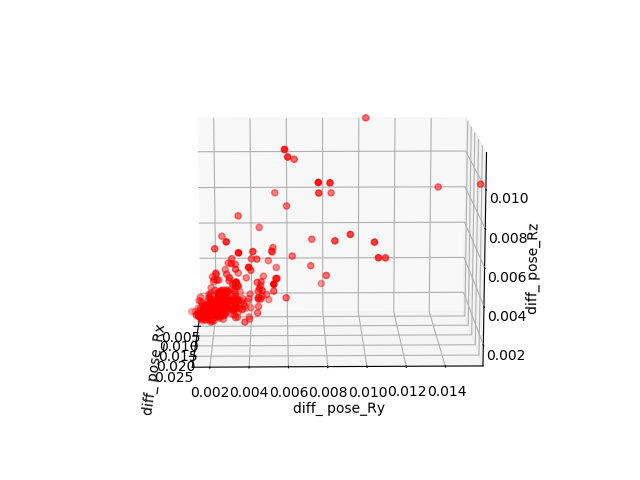

In [7]:
#######################################################################################################################
# Plot all datapoints from all subjects in one figure
#######################################################################################################################

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='r', marker='o')
ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
plt.show()